In [42]:
import pandas as pd 
import numpy as np 
import os
import cv2
##import tensorflow as tf
import datetime
import re
import matplotlib.pyplot as plt

In [43]:
############## Train Images #######################
path="C:/Users/Anthony/Desktop/University of Waterloo/Data Science 4_Machine Learning/Group Assignment/17810_23812_bundle_archive/chest_xray/train/PNEUMONIA"

pneunmonia_imgs=os.listdir(path)


path_normal="C:/Users/Anthony/Desktop/University of Waterloo/Data Science 4_Machine Learning/Group Assignment/17810_23812_bundle_archive/chest_xray/train/NORMAL"

normal_imgs=os.listdir(path_normal)

############# Test Images #########################
path_val="C:/Users/Anthony/Desktop/University of Waterloo/Data Science 4_Machine Learning/Group Assignment/17810_23812_bundle_archive/chest_xray/val/PNEUMONIA"

pneunmonia_imgs_val=os.listdir(path_val)


path_normal_val="C:/Users/Anthony/Desktop/University of Waterloo/Data Science 4_Machine Learning/Group Assignment/17810_23812_bundle_archive/chest_xray/val/NORMAL"

normal_imgs_val=os.listdir(path_normal_val)

############# Val Images ##########################
path_test="C:/Users/Anthony/Desktop/University of Waterloo/Data Science 4_Machine Learning/Group Assignment/17810_23812_bundle_archive/chest_xray/test/PNEUMONIA"

pneunmonia_imgs_test=os.listdir(path_test)


path_normal_test="C:/Users/Anthony/Desktop/University of Waterloo/Data Science 4_Machine Learning/Group Assignment/17810_23812_bundle_archive/chest_xray/test/NORMAL"

normal_imgs_test=os.listdir(path_normal_test)

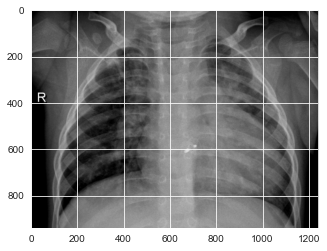

In [44]:
width = 256
height = 256

###### 1 = Gray, 0 = Color, -1 = unchanged #####
type_of_color = 1

test = cv2.imread(path + '/' +pneunmonia_imgs[3],type_of_color)
plt.imshow(test)
plt.show()


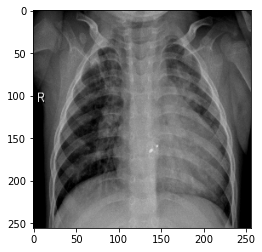

In [4]:
resize = cv2.resize(test, (width,height))
plt.imshow(resize)
plt.show()

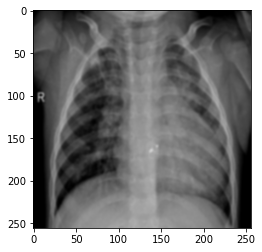

In [5]:
blur = cv2.GaussianBlur(resize, (5, 5), 0)
plt.imshow(blur)
plt.show()

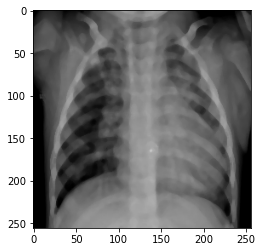

In [6]:
test_Mblur = cv2.medianBlur(resize, 5)
plt.imshow(test_Mblur)
plt.show()

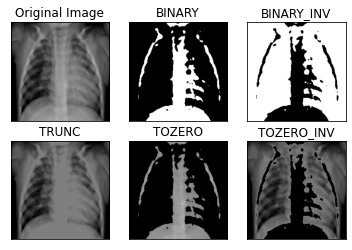

In [7]:
ret,thresh1 = cv2.threshold(test_Mblur,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(test_Mblur,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(test_Mblur,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(test_Mblur,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(test_Mblur,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [test_Mblur, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

In [67]:
###RUN THIS ###

################# Train Images ###################



normaldf = []
for i in range (len(normal_imgs)-1):
    if len(re.findall("jpeg",normal_imgs[i]))>0: 
        read_n_train = cv2.imread(path_normal + '/' +normal_imgs[i],type_of_color)
        resize_n_train = cv2.resize(read_n_train, (width,height))
        blur_n_train=cv2.cvtColor(resize_n_train, cv2.COLOR_BGR2GRAY)
        #blur_n_train=resize_n_train
        blur_n_train2 = cv2.medianBlur(blur_n_train, 5)
        normaldf.append(blur_n_train2)
pneumoniadf = []
for i in range (len(pneunmonia_imgs)):
    if len(re.findall("jpeg",pneunmonia_imgs[i]))>0: 
        read_p_train = cv2.imread(path + '/' +pneunmonia_imgs[i],type_of_color)
        resize_p_train = cv2.resize(read_p_train, (width,height))
        blur_p_train=cv2.cvtColor(resize_p_train, cv2.COLOR_BGR2GRAY)
        blur_p_train2 = cv2.medianBlur(blur_p_train, 5)
        pneumoniadf.append(blur_p_train2)

################# Test Images ###################

normaldf_test = []
for i in range (len(normal_imgs_test)):
    if len(re.findall("jpeg",normal_imgs_test[i]))>0:
        read_n_test = cv2.imread(path_normal_test + '/' +normal_imgs_test[i],type_of_color)
        resize_n_test = cv2.resize(read_n_test, (width,height))
        blur_n_test=cv2.cvtColor(resize_n_test, cv2.COLOR_BGR2GRAY)
        blur_n_test2 = cv2.medianBlur(blur_n_test, 5)
        normaldf_test.append(blur_n_test2)
    
pneumoniadf_test = []
for i in range (len(pneunmonia_imgs_test)):
    if len(re.findall("jpeg",pneunmonia_imgs_test[i]))>0:
        read_p_test = cv2.imread(path_test + '/' +pneunmonia_imgs_test[i],type_of_color)
        resize_p_test = cv2.resize(read_p_test, (width,height))
        blur_p_test=cv2.cvtColor(resize_p_test, cv2.COLOR_BGR2GRAY)
        blur_p_test2 = cv2.medianBlur(blur_p_test, 5)
        pneumoniadf_test.append(blur_p_test2)

################# Val Images ###################
normaldf_val = []
for i in range (len(normal_imgs_val)):
    if len(re.findall("jpeg",normal_imgs_val[i]))>0:
        read_n_val = cv2.imread(path_normal_val + '/' +normal_imgs_val[i],type_of_color)
        resize_n_val = cv2.resize(read_n_val, (width,height))
        blur_n_val=cv2.cvtColor(resize_n_val, cv2.COLOR_BGR2GRAY)
        blur_n_val2 = cv2.medianBlur(blur_n_val, 5)
        normaldf_val.append(blur_n_val2)
    
pneumoniadf_val = []
for i in range (len(pneunmonia_imgs_val)):
    if len(re.findall("jpeg",pneunmonia_imgs_val[i]))>0:
        read_p_val = cv2.imread(path_val + '/' +pneunmonia_imgs_val[i],type_of_color)
        resize_p_val = cv2.resize(read_p_val, (width,height))
        blur_p_val=cv2.cvtColor(resize_p_val, cv2.COLOR_BGR2GRAY)
        blur_p_val2 = cv2.medianBlur(blur_p_val, 5)
        pneumoniadf_val.append(blur_p_val2)

In [66]:
#len(normaldf)
#print(normaldf)
#normaldf[1][1].shape
#pd.DataFrame(normaldf[2].reshape(150*150)).transpose()
#normaldf[1][1].shape
#normaldf[1].shape
#normaldf[1].reshape(150*150)
#normaldf[1]
normaldf[1][1]





array([[ 18,  18,  18],
       [ 25,  25,  25],
       [ 31,  31,  31],
       [ 34,  34,  34],
       [ 39,  39,  39],
       [ 43,  43,  43],
       [ 45,  45,  45],
       [ 48,  48,  48],
       [ 54,  54,  54],
       [ 83,  83,  83],
       [ 91,  91,  91],
       [ 93,  93,  93],
       [ 94,  94,  94],
       [ 95,  95,  95],
       [101, 101, 101],
       [101, 101, 101],
       [102, 102, 102],
       [105, 105, 105],
       [108, 108, 108],
       [109, 109, 109],
       [102, 102, 102],
       [ 97,  97,  97],
       [ 78,  78,  78],
       [ 64,  64,  64],
       [ 62,  62,  62],
       [ 61,  61,  61],
       [ 59,  59,  59],
       [ 60,  60,  60],
       [ 62,  62,  62],
       [ 65,  65,  65],
       [ 91,  91,  91],
       [115, 115, 115],
       [146, 146, 146],
       [147, 147, 147],
       [147, 147, 147],
       [145, 145, 145],
       [142, 142, 142],
       [125, 125, 125],
       [124, 124, 124],
       [124, 124, 124],
       [125, 125, 125],
       [136, 136

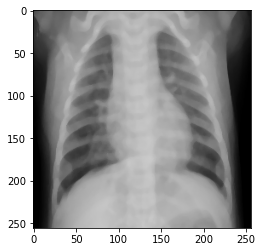

In [9]:
plt.imshow(pneumoniadf[1])
plt.show()

In [47]:
width = 150
height = 150

In [68]:
normal_train=compact_imagestodf(normaldf,width,height)
pneumonia_train=compact_imagestodf(pneumoniadf,width,height)
normal_train['Target']='0'
pneumonia_train['Target']='1'


normal_train_val=compact_imagestodf(normaldf_val,width,height)
pneumonia_train_val=compact_imagestodf(pneumoniadf_val,width,height)
normal_train_val['Target']='0'
pneumonia_train_val['Target']='1'



normal_train_test=compact_imagestodf(normaldf_test,width,height)
pneumonia_train_test=compact_imagestodf(pneumoniadf_test,width,height)
normal_train_test['Target']='0'
pneumonia_train_test['Target']='1'

In [69]:
pd_train=pd.concat([normal_train,pneumonia_train],axis=0)

pd_val=pd.concat([normal_train_val,pneumonia_train_val],axis=0)
pd_test=pd.concat([normal_train_test,pneumonia_train_test],axis=0)

pd_train.reset_index(inplace=True)
pd_val.reset_index(inplace=True)
pd_test.reset_index(inplace=True)

In [70]:
X_train=np.array(pd_train.iloc[:,np.arange(0,pd_train.shape[1]-1)])/255
X_val=np.array(pd_val.iloc[:,np.arange(0,pd_val.shape[1]-1)])/255
X_test=np.array(pd_test.iloc[:,np.arange(0,pd_test.shape[1]-1)])/255

Y_train=np.array(pd_train['Target'])
Y_val=np.array(pd_val['Target'])
Y_test=np.array(pd_test['Target'])

In [71]:
for dirname, _, filenames in os.walk('/kaggle/input/chest-xray-pneumonia/chest_xray/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [11]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) 
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [12]:
train = get_training_data(r"C:/Users/Anthony/Desktop/University of Waterloo/Data Science 4_Machine Learning/Group Assignment/17810_23812_bundle_archive/chest_xray/train/")

In [13]:
test = get_training_data(r"C:/Users/Anthony/Desktop/University of Waterloo/Data Science 4_Machine Learning/Group Assignment/17810_23812_bundle_archive/chest_xray/test/")

In [14]:
val = get_training_data(r"C:/Users/Anthony/Desktop/University of Waterloo/Data Science 4_Machine Learning/Group Assignment/17810_23812_bundle_archive/chest_xray/val/")

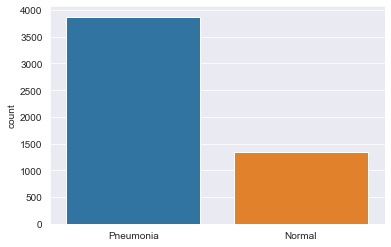

In [15]:
import seaborn as sns
l = []
for i in train:
    if(i[1] == 0):
        l.append("Pneumonia")
    else:
        l.append("Normal")
sns.set_style('darkgrid')
sns.countplot(l)

In [18]:
X_train = []
y_train = []

X_val = []
y_val = []

X_test = []
y_test = []

for feature, label in train:
    X_train.append(feature)
    y_train.append(label)

for feature, label in test:
    X_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    X_val.append(feature)
    y_val.append(label)

In [40]:
def compact_imagestodf(df,width,height):

    output=pd.DataFrame()
    for i in np.arange(0,len(df)):
            output=pd.concat([output,pd.DataFrame(df[i].reshape(width*height)).transpose()],axis=0)
    return(output)

In [72]:
X_train = np.array(X_train) / 255
X_val = np.array(X_val) / 255
X_test = np.array(X_test) / 255

In [23]:
X_train = X_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

X_val = X_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

X_test = X_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [73]:
X_test.shape


(624, 22501)

In [74]:
from sklearn.ensemble import RandomForestClassifier

modellist = [RandomForestClassifier()]

from sklearn.metrics import f1_score,roc_auc_score,accuracy_score,roc_curve,confusion_matrix, auc
import itertools
from sklearn.model_selection import GridSearchCV

In [34]:
X_test.shape

(1044, 22500)

In [77]:
for model in modellist:
    modelfit = model.fit(X_train, Y_train)
    modelypred = modelfit.predict(X_test)
    print (str(model).split("(")[0] + ": " + str(round(accuracy_score(Y_test, modelypred),3)))

RandomForestClassifier: 0.771


In [78]:
preds = model.predict(np.array(X_test))

In [81]:
roc_auc_score(np.array(Y_test), preds)

#f1_score(np.array(Y_test), preds)

0.697008547008547

In [85]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
#precision_score(np.array(Y_test), preds, average= 'binary')

#recall_score(np.array(Y_test), preds, average= 'binary')

In [84]:
print(confusion_matrix(np.array(Y_test), preds))

[[ 94 140]
 [  3 387]]


In [87]:
from sklearn import metrics
print("GINI_KNN",(2*metrics.roc_auc_score(np.ravel(Y_test), preds)-1))

GINI_KNN 0.39401709401709395


In [90]:
print("recall : ", (387/(387+3)))
print("precision : ", (387/(387+140)))

recall :  0.9923076923076923
precision :  0.7343453510436433


In [33]:
preds.shape

(1044,)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score,roc_auc_score

print(confusion_matrix(test_data_gen.classes, test_prediction9_2))
print(accuracy_score(test_data_gen.classes, test_prediction9_2))
print(precision_score(test_data_gen.classes, test_prediction9_2,pos_label=1))
print(recall_score(test_data_gen.classes, test_prediction9_2,pos_label=1))
print(roc_auc_score(test_data_gen.classes, test_prediction9_2))